# LinkedIn Recommendation System

## Dataset download

This project uses the **“1.3M LinkedIn Jobs and Skills 2024”** dataset available on [Kaggle](https://www.kaggle.com/datasets/asaniczka/1-3m-linkedin-jobs-and-skills-2024).

The dataset contains over **1.3 million LinkedIn job postings** collected in 2024, including detailed information on job titles, descriptions, companies, and associated skills. It is used to train and evaluate our job recommendation system.

### Download Options

You can obtain the dataset in two ways:

1. **Using the Kaggle API (Recommended)** — automatic download and extraction.  
2. **Manual Download** — download the ZIP file directly from the dataset page and extract it yourself.


### Option 1 — Using the Kaggle API

To use the Kaggle API, ensure you have the Kaggle CLI installed and configured.

```bash
# Install Kaggle CLI
pip install kaggle

# Move your Kaggle API key (kaggle.json) into place
mkdir -p ~/.kaggle
mv ~/Downloads/kaggle.json ~/.kaggle/
chmod 600 ~/.kaggle/kaggle.json
```

Once configured, you can run the provided script to automatically download and unzip the dataset into the `data/` folder.

```bash
chmod +x ./download_linkedin_dataset.sh
./download_linkedin_dataset.sh
```

This script:
- Creates the `data/` folder if it does not exist.
- Downloads the dataset from Kaggle.
- Extracts the contents.
- Removes the ZIP file after extraction.

### Option 2 — Manual Download

If you prefer not to use the Kaggle API, you can manually download the dataset from:

🔗 **[https://www.kaggle.com/datasets/asaniczka/1-3m-linkedin-jobs-and-skills-2024](https://www.kaggle.com/datasets/asaniczka/1-3m-linkedin-jobs-and-skills-2024)**

After downloading:
1. Extract the ZIP file.  
2. Move all extracted files into the `data/` directory in your project.

### Notes
- Ensure your Kaggle API credentials (`kaggle.json`) are correctly configured in `~/.kaggle/`.
- The dataset is distributed under the **ODC Attribution License (ODC-By)**.
- The total size is ~2 Gb (~1.3M entries), so the download may take several minutes depending on your connection.

## Data preparation

### Load and Inner Join

We load two CSVs:

- `job_postings_df` from `./data/linkedin_job_postings.csv`
- `job_summary_df` from `./data/job_summary.csv`
- `job_skills_df` from `./data/job_skills.csv`

We then **inner join** on the unique key `job_link`:

- `jobs_df = pd.merge(job_postings_df, job_skills_df, on="job_link", how="inner")`
- `jobs_df = pd.merge(jobs_df, job_summary_df, on="job_link", how="inner")`

This keeps only postings that exist in every sources and ensures aligned rows across tables.


In [1]:
import pandas as pd

# Load the datasets
job_skills_df = pd.read_csv('./data/job_skills.csv')
# job_summary_df = pd.read_csv('./data/job_summary.csv')
job_postings_df = pd.read_csv('./data/linkedin_job_postings.csv')


In [2]:
job_skills_df.head()

,job_link,job_skills
0,https://www.linkedin.com/jobs/view/housekeeper...,"Building Custodial Services, Cleaning, Janitor..."
1,https://www.linkedin.com/jobs/view/assistant-g...,"Customer service, Restaurant management, Food ..."
2,https://www.linkedin.com/jobs/view/school-base...,"Applied Behavior Analysis (ABA), Data analysis..."
3,https://www.linkedin.com/jobs/view/electrical-...,"Electrical Engineering, Project Controls, Sche..."
4,https://www.linkedin.com/jobs/view/electrical-...,"Electrical Assembly, Point to point wiring, St..."


In [ ]:
#job_summary_df.head()

In [3]:
job_postings_df.head()

,job_link,last_processed_time,got_summary,got_ner,is_being_worked,job_title,company,job_location,first_seen,search_city,search_country,search_position,job_level,job_type
0,https://www.linkedin.com/jobs/view/account-exe...,2024-01-21 07:12:29.00256+00,t,t,f,Account Executive - Dispensing (NorCal/Norther...,BD,"San Diego, CA",2024-01-15,Coronado,United States,Color Maker,Mid senior,Onsite
1,https://www.linkedin.com/jobs/view/registered-...,2024-01-21 07:39:58.88137+00,t,t,f,Registered Nurse - RN Care Manager,Trinity Health MI,"Norton Shores, MI",2024-01-14,Grand Haven,United States,Director Nursing Service,Mid senior,Onsite
2,https://www.linkedin.com/jobs/view/restaurant-...,2024-01-21 07:40:00.251126+00,t,t,f,RESTAURANT SUPERVISOR - THE FORKLIFT,Wasatch Adaptive Sports,"Sandy, UT",2024-01-14,Tooele,United States,Stand-In,Mid senior,Onsite
3,https://www.linkedin.com/jobs/view/independent...,2024-01-21 07:40:00.308133+00,t,t,f,Independent Real Estate Agent,Howard Hanna | Rand Realty,"Englewood Cliffs, NJ",2024-01-16,Pinehurst,United States,Real-Estate Clerk,Mid senior,Onsite
4,https://www.linkedin.com/jobs/view/group-unit-...,2024-01-19 09:45:09.215838+00,f,f,f,Group/Unit Supervisor (Systems Support Manager...,"IRS, Office of Chief Counsel","Chamblee, GA",2024-01-17,Gadsden,United States,Supervisor Travel-Information Center,Mid senior,Onsite


In [4]:
jobs_df = pd.merge(job_postings_df, job_skills_df, on='job_link', how='inner')
#jobs_df = pd.merge(jobs_df, job_summary_df, on='job_link', how='inner')

In [ ]:
jobs_df.describe()

,job_link,last_processed_time,got_summary,got_ner,is_being_worked,job_title,company,job_location,first_seen,search_city,search_country,search_position,job_level,job_type,job_skills
count,1296381,1296381,1296381,1296381,1296381,1296381,1296372,1296362,1296381,1296381,1296381,1296381,1296381,1296381,1294296
unique,1296381,722728,1,1,1,565695,88995,28791,6,1018,4,1923,2,3,1287101
top,https://www.linkedin.com/jobs/view/account-exe...,2024-01-19 09:45:09.215838+00,t,t,f,LEAD SALES ASSOCIATE-FT,Health eCareers,"New York, NY",2024-01-14,North Carolina,United States,Account Executive,Mid senior,Onsite,"Front Counter, DriveThru, Outside Order Taker,..."
freq,1,573487,1296381,1296381,1296381,7315,40049,12580,459354,9495,1105410,19465,1155276,1285565,169


In [5]:
input_cols = ['job_link', 'job_title', 'job_location', 'search_country', 'job_skills', 'company', 'search_position', 'job_level']

### Row Filtering

We remove rows that do not contain the required NLP outputs and rows flagged as in-progress:

- Drop entries **without NER** results.
- Drop entries **without summary**.
- Drop entries where **`is_being_worked` is `True`**.

This reduces noise and guarantees each training sample has complete text features.

In [6]:
jobs_df = jobs_df.loc[
    (jobs_df["is_being_worked"] == "f")
    & (jobs_df["got_summary"] == "t")
    & (jobs_df["got_ner"] == "t")
]

jobs_df = jobs_df[input_cols].dropna().reset_index(drop=True)

### Title Normalization and Reduction of Unique Values

We normalize `job_title` with a custom function:

1. **Lowercase** titles.
2. **Trim at the first dash**: keep text before `"-"` to collapse variants like  
   `Senior Software Engineer - Backend` → `senior software engineer`.
3. **Remove parenthetical fragments**: delete content inside `(...)`, e.g.  
   `data scientist (NLP)` → `data scientist`.
4. **Strip whitespace**.

**Effect:** Different textual variants map to a **single canonical form**, which **reduces the number of unique job titles** and stabilizes downstream grouping and modeling.


In [7]:
def _clean_job_titles(job_title: str):
    job_title = job_title.lower()
    if '-' in job_title:
        job_title = job_title.split('-')[0].strip()
    job_title = job_title.split('(')[0].strip()
    return job_title.strip()

jobs_df['job_title'] = jobs_df['job_title'].astype(str).apply(_clean_job_titles)

### Skill Canonicalization and Reduction of Unique Values

We clean `job_skills` as a comma-separated list:

1. **Split by comma** and **strip** whitespace.
2. **Lowercase** each skill token.
3. **De-duplicate per posting** to avoid repeated skills.
4. **Sort tokens** so the per-row skill list has a consistent order.

We also track a **global set of unique skills** to measure coverage.

**Effect:** Canonicalization merges superficial variants and ordering differences, which **reduces both per-row and global unique skill counts**. This yields a more compact and reliable skill space.


In [8]:
import re

# create a cleaned list of skills per job and a global unique skills array
def _clean_split_skills(skills_str: str):
    skills_str = skills_str.lower()
    parts = str(skills_str).split(',')
    unique = set()
    for part in parts:
        # remove non A-Za-z characters except whitespace, collapse spaces and strip ends
        c = re.sub(r'[^A-Za-z\s]', '', part)
        c = re.sub(r'\s+', ' ', c).strip()
        if c:
            unique.add(c)
    # return a deterministic, cleaned, ordered string
    ordered = sorted(unique)
    return ', '.join(ordered)

jobs_df['job_skills'] = jobs_df['job_skills'].astype(str).apply(_clean_split_skills)

In [ ]:
display(jobs_df.head())

,job_link,job_title,job_location,search_country,job_skills,company,search_position,job_level
0,https://www.linkedin.com/jobs/view/account-exe...,account executive,"San Diego, CA",United States,"bachelors degree, bd offerings, challenges, co...",BD,Color Maker,Mid senior
1,https://www.linkedin.com/jobs/view/registered-...,registered nurse,"Norton Shores, MI",United States,"bachelor of science in nursing, care managemen...",Trinity Health MI,Director Nursing Service,Mid senior
2,https://www.linkedin.com/jobs/view/restaurant-...,restaurant supervisor,"Sandy, UT",United States,"arithmetic skills, bending and kneeling abilit...",Wasatch Adaptive Sports,Stand-In,Mid senior
3,https://www.linkedin.com/jobs/view/independent...,independent real estate agent,"Englewood Cliffs, NJ",United States,"closing statements, communication, customer se...",Howard Hanna | Rand Realty,Real-Estate Clerk,Mid senior
4,https://www.linkedin.com/jobs/view/registered-...,registered nurse,"Muskegon, MI",United States,"bsn, diversity, equal opportunity employer, eq...",Trinity Health MI,Nurse Practitioner,Mid senior


In [9]:
seen = set()
skills_array = []
for lst in jobs_df['job_skills']:
    for skill in lst.split(','):
        skill = skill.strip()
        if skill not in seen:
            seen.add(skill)
            skills_array.append(skill)

print(f"Jobs rows: {len(jobs_df)}, sample job_skills (first 5):\n", jobs_df['job_skills'].head())
print(f"Global unique skills count: {len(skills_array)}")
#skills_array[:20]

Jobs rows: 1294268, sample job_skills (first 5):
 0    bachelors degree, bd offerings, challenges, co...
1    bachelor of science in nursing, care managemen...
2    arithmetic skills, bending and kneeling abilit...
3    closing statements, communication, customer se...
4    bsn, diversity, equal opportunity employer, eq...
Name: job_skills, dtype: object
Global unique skills count: 2668569


### Location Cleaning and Reduction of Unique Values

We standardize `job_location` by **keeping only the part before the first comma**:

- Example: `San Diego, CA` → `San Diego`

**Effect:** This collapses formatting variants that differ only by state or country suffix. It **reduces the number of unique locations** and helps counter sparse geography fields while preserving city-level signal.

In [10]:
def _clean_location(loc: str):
    return loc.split(',')[0].strip()

jobs_df['job_location'] = jobs_df['job_location'].astype(str).apply(_clean_location)

## Data Filtering 
The clean dataset is composed of 1.294.268 jobs posts. For simplification, we focus on the city with the most number of jobs posts (New York)

In [11]:
jobs_df.shape

(1294268, 8)

In [12]:
jobs_df['job_location'].value_counts()

job_location
New York, NY                                 12562
London, England, United Kingdom              10879
Houston, TX                                  10317
Chicago, IL                                  10155
Los Angeles, CA                               9724
                                             ...  
Snyder County, PA                                1
Red Hill, SC                                     1
Rufford, England, United Kingdom                 1
Tantallon, Nova Scotia, Canada                   1
Aldinga Beach, South Australia, Australia        1
Name: count, Length: 28776, dtype: int64

In [ ]:
##this is in case we want to filter by a different method, filtering the dataset by a threshold of posts.

# min_jobs = 100      
# max_jobs = 500   

# jobs_df = (
#     jobs_df
#     .groupby(['search_country', 'job_location'])
#     .filter(lambda x: len(x) >= min_jobs)  
#     .groupby(['search_country', 'job_location'], group_keys=False)
#     .apply(lambda x: x.sample(n=min(len(x), max_jobs), random_state=42))
# ).reset_index(drop=True)

In [13]:
jobs_df = jobs_df[jobs_df['job_location'] == 'New York'].reset_index(drop=True)

In [ ]:
jobs_df.describe()

,job_link,job_title,job_location,search_country,job_skills,company,search_position,job_level
count,14850,14850,14850,14850,14850,14850,14850,14850
unique,14850,8822,1,2,14842,4032,1147,2
top,https://www.linkedin.com/jobs/view/part-time-h...,executive assistant,New York,United States,"background check, csea tuition vouchers, envir...",DocCafe,Account Executive,Mid senior
freq,1,174,14850,14849,2,218,402,12481


### Feature Set Used

After preprocessing, the working DataFrame includes the key fields required for analysis and modeling:

- `job_link` (primary key, post-join)
- `job_title` (normalized)
- `job_location` (city-only normalized)
- `search_country`
- `job_skills` (cleaned, sorted, de-duplicated)
- `job_description`
- `search_position`
- `job_level`

These fields form the basis for representation building and recommendation.


### Impact on Cardinality (Unique Values)

The following transformations are specifically designed to **reduce the number of unique values**:

- **Job titles:** lowercasing, dash-trim, and parenthesis removal collapse stylistic variants.
- **Skills:** lowercase normalization, de-duplication, and sorted lists produce canonical rows and reduce global skill vocabulary.
- **Locations:** truncation before the first comma unifies location strings.

This cardinality reduction improves:
- Statistical reliability of counts and co-occurrences.
- Memory usage and runtime.
- Model stability and generalization.

# Content-Based Recommendation System

In [14]:
#unique number of skills
jobs_df["job_skills"].nunique()

14842

In [15]:
from collections import defaultdict
from itertools import combinations
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from collections import Counter

In order to build a content-based recommendation system, the dataset must first undergo preprocessing. This is especially important because the dataset is large, and unprocessed text can make computation slow and expensive.
Since the dataset contains 14.842 unique skills, many of them appear only a few times. As a first step, we remove rare skills that appear fewer than 10 times, reducing noise and improving the quality of the TF-IDF representations.

In [17]:
rare_skill_threshold = 10

In [25]:
def remove_rare_skills(jobs_df, rare_skill_threshold):
    # Flatten all skills and strip spaces
    all_skills = [s.strip() for skills in jobs_df['job_skills'] for s in skills.split(',')]
    
    # Count frequency
    skill_counts = Counter(all_skills)
    
    # Identify rare skills
    rare_skills = {skill for skill, count in skill_counts.items() if count <= rare_skill_threshold}
    
    # Remove rare skills from each job
    def filter_skills(skills_str):
        skills = [s.strip() for s in skills_str.split(',')]
        skills = [s for s in skills if s not in rare_skills]
        return ', '.join(skills)
    
    jobs_df['job_skills'] = jobs_df['job_skills'].apply(filter_skills)
    # Remove jobs with no skills left
    jobs_df = jobs_df[jobs_df['job_skills'].str.strip() != ''].reset_index(drop=True)
    return jobs_df

jobs_df = remove_rare_skills(jobs_df, rare_skill_threshold)
jobs_df.shape

(14767, 9)

As the next step, we preprocess the data to prepare it for vectorization. Since our goal is to recommend jobs based on a user's title and skills, we combine these two fields into a single text input. This merged representation allows the TF-IDF vectorizer to capture the full semantic context of both the job title and its associated skills.

In [20]:
def preprocess(df):
    df['title_skills'] = df['job_title'] + " " + df['job_skills']
    return df
jobs_df = preprocess(jobs_df)
    

Finally, we are ready to create the TF-IDF representation. At this stage, we select the `min_df` and `max_df` parameters, which determine how frequently a term must appear to be included in the vocabulary.

`min_df` filters out terms that appear too rarely.

`max_df` filters out terms that appear too frequently.

After fitting the vectorizer, we obtain a TF-IDF matrix of shape (14,767 × 526), where each row corresponds to a job post and each column represents a distinct skill.

In [44]:
vectorizer = TfidfVectorizer(
            stop_words='english',
            max_features=10000,       
            min_df=100,               
            max_df=0.8                
        )
matrix = vectorizer.fit_transform(jobs_df["title_skills"])

Once we have the TF-IDF matrix, we can generate job recommendations based on a user’s title and skills. The user provides a job title of interest along with a list of skills they possess. The algorithm concatenates these inputs into a single text string and uses the vectorizer’s transform function to convert it into a TF-IDF vector.
We then compute cosine similarity between the user’s vector and all job posts in the dataset. Finally, the system selects the top 5 job posts with the highest similarity scores, returning the most relevant recommendations.

In [65]:
def preprocess_input(title, skills):
    input_title_skills = title + " " + ", ".join(skills)
    return input_title_skills

def fit_input_tfidf(vectorizer, input_title_skills):
        input_vec = vectorizer.transform([input_title_skills])
        return input_vec

def print_recommendations(recommended_jobs):
        print("Recommended jobs:")
        display(recommended_jobs[['company','job_title', 'job_skills', 'job_location']])

def recommend(df, query, vectorizer, matrix, top_k=5):
        input_title_skills = preprocess_input(query['title'], query['skills'])
        input_vec = fit_input_tfidf(vectorizer, input_title_skills)
        
        # Filter by city, fallback to country
        jobs_to_search = df[df['job_location'] == query['city']].index.to_list()
        if len(jobs_to_search) < 2:
            jobs_to_search = df[df['search_country'] == query['country']].index.to_list()

        matrix_subset = matrix[jobs_to_search]
        cos_scores = cosine_similarity(input_vec, matrix_subset).flatten()
        top_indices_in_subset = cos_scores.argsort()[::-1][:top_k]
        similar_indices = [jobs_to_search[i] for i in top_indices_in_subset]
        recommended_jobs = df.iloc[similar_indices]

        return print_recommendations(recommended_jobs)

In [66]:
query = {'city': 'New York', 'country': 'United States', 'title': 'Data Scientist', 'skills': ['python', 'machine learning', 'data analysis']}
recommend(jobs_df, query, vectorizer, matrix, top_k=5)

Recommended jobs:


,company,job_title,job_skills,job_location
2887,X4 Life Sciences,senior/principal machine learning scientist,"collaboration, data preprocessing, machine lea...",New York
2879,257,data scientist,"algorithms, big data, data analysis, data engi...",New York
3713,Tribal Tech - The Digital & Tech Recruitment S...,machine learning / data scientist,"clustering, collaboration, communication, comp...",New York
3335,JBC,staff data scientist,"clustering, collaboration skills, communicatio...",New York
13200,"Tribal Tech - The Digital, Data & AI Specialists",machine learning / data scientist,"clustering, collaboration, communication, comp...",New York


# Association Rules

In addition to recommending jobs based on similarity, we can suggest complementary skills using association rules. By analyzing which skills frequently appear together across job posts, we can discover patterns such as “users with skill A often also have skill B.” This allows the system to recommend additional skills a user might consider learning to improve their job prospects.

## A-Priori Algorithm
We use the Apriori algorithm to identify frequent sets of skills in the dataset. Apriori scans the job posts to find combinations of skills that occur together above a minimum support threshold. From these frequent itemsets, we generate association rules that describe patterns such as “if a job requires skill A and B, it often also requires skill C.” These rules can then be used to recommend additional skills to a user.

In [55]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

We use the Apriori algorithm to discover frequently co-occurring skills in job posts. By setting a minimum support of 0.005, we only consider skill combinations that appear in at least 0.5% of the dataset. From these frequent itemsets, we generate association rules with a minimum confidence of 0.5.

These rules allow the system to recommend complementary skills: given a user’s existing skills, the algorithm suggests additional skills that often appear together in job posts.

In [59]:
min_support=0.005
min_threshold=0.5

In [60]:
def compute_frequent_itemsets(df, min_support, min_threshold=0.5):
        transactions = df['job_skills'].apply(lambda x: [s.strip() for s in x.split(',')]).tolist()
        te = TransactionEncoder()
        te_ary = te.fit(transactions).transform(transactions)
        df_onehot = pd.DataFrame(te_ary, columns=te.columns_)
        
        frequent_itemsets = apriori(df_onehot, min_support=min_support, use_colnames=True)
        rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=min_threshold)
        return rules
rules = compute_frequent_itemsets(jobs_df,min_support, min_threshold)

### Recommending Additional Skills

Given a user’s current skills, we can filter the association rules to find consequents that complement their skill set. The top recommendations are sorted by confidence or lift.

In [62]:
def recommend_skills(rules, user_skills, top_n=5, sort_by='confidence'):
        # Filter rules where antecedents are subset of user_skills
        matching_rules = rules[rules['antecedents'].apply(lambda x: set(x).issubset(user_skills))]
        
        # Collect consequents
        recommended_skills = set()
        for cons in matching_rules['consequents']:
            recommended_skills.update(cons)
        
        # Remove skills user already has
        recommended_skills = recommended_skills - set(user_skills)
        
        # Optionally, sort by confidence or lift
        if not matching_rules.empty:
            sorted_rules = matching_rules.sort_values(by=sort_by, ascending=False)
            recommended_skills_ordered = []
            for cons in sorted_rules['consequents']:
                for skill in cons:
                    if skill in recommended_skills and skill not in recommended_skills_ordered:
                        recommended_skills_ordered.append(skill)
            return recommended_skills_ordered[:top_n]
        
        return list(recommended_skills)[:top_n]

recommended_skills = recommend_skills(rules, query['skills'], top_n=5)
print("Recommended additional skills:", recommended_skills)

Recommended additional skills: ['sql']


## Job-Job Network Construction

**Note:** I initially attempted to build a **Skills Co-occurrence Graph**. However, the resulting network was **too chaotic for any measure** to be useful.

Therefore, we have switched to a **Job-Job Network** approach.

We want to build a network where:
- **Nodes** are individual job postings.
- **Edges** connect jobs that share specific, meaningful skills.

In [16]:
import networkx as nx
from itertools import combinations
import numpy as np, pandas as pd
import matplotlib.pyplot as plt, seaborn as sns
from collections import Counter

For computationnal purpose, I will restrain the dataset to the jobs of New York

In [17]:
mask = jobs_df['job_location'].astype(str).str.lower().str.contains(r'\bnew york\b')
jobs_df_ny = jobs_df[mask].reset_index(drop=True)

print(f"Rows before: {len(jobs_df)}, after filtering to New York: {len(jobs_df_ny)}")

Rows before: 1294277, after filtering to New York: 16329


To avoid a "hairball" graph where everyone is connected to everyone (ex: "Communication" or "Excel"), we first identify and remove **generic skills**.

In [18]:
# Subset for processing
N = 5000 # for speed
df_subset = jobs_df_ny.head(N).copy()

# Identify too common skills
all_skills = []
for skills_str in df_subset['job_skills']:
    skills = [s.strip() for s in str(skills_str).split(',') if s.strip()]
    all_skills.extend(skills)

# Remove skills represent in > 10% of jobs
skill_counts = Counter(all_skills)
threshold = len(df_subset) * 0.1
stop_skills = {skill for skill, count in skill_counts.items() if count > threshold}

print(f"Identified {len(stop_skills)} generic skills to ignore (e.g., {list(stop_skills)[:5]})")

Identified 11 generic skills to ignore (e.g., ['project management', 'communication skills', 'data analysis', 'collaboration', 'attention to detail'])


### Building the Graph

We iterate through our jobs and connect them only if they share **at least 2 specific skills** (excluding the generic ones). This ensures the connections represent a genuine professional overlap.

In [19]:
G_jobs = nx.Graph()

# Add nodes
for idx, row in df_subset.iterrows():
    G_jobs.add_node(idx, title=row['job_title'])

# Map specific skills to jobs
skill_to_jobs = {}
for idx, row in df_subset.iterrows():
    skills = [s.strip() for s in str(row['job_skills']).split(',') if s.strip()]
    for skill in skills:
        if skill not in stop_skills:
            skill_to_jobs.setdefault(skill, []).append(idx)

# Create edges (jobs sharing specific skills)
edge_weights = {}
for job_indices in skill_to_jobs.values():
    if len(job_indices) < 2: continue
    for u, v in combinations(job_indices, 2):
        if u > v: u, v = v, u
        edge_weights[(u, v)] = edge_weights.get((u, v), 0) + 1

# Add edges with weight >= 2
for (u, v), w in edge_weights.items():
    if w >= 2:
        G_jobs.add_edge(u, v, weight=w)

# Keep only the largest connected component
gcc_nodes = max(nx.connected_components(G_jobs), key=len)
GCC_jobs = G_jobs.subgraph(gcc_nodes).copy()
print(f"Graph built with {GCC_jobs.number_of_nodes()} jobs and {GCC_jobs.number_of_edges()} connections.")

Graph built with 4819 jobs and 363874 connections.


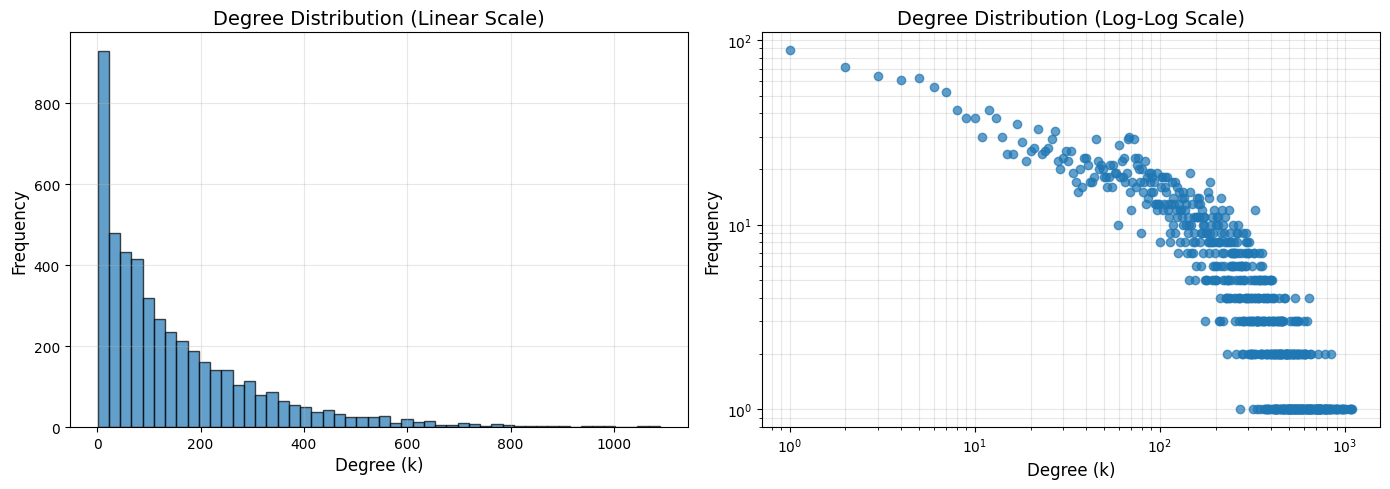

In [20]:
# Degree distribution
degrees = dict(GCC_jobs.degree())
degree_values = list(degrees.values())

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Linear scale
axes[0].hist(degree_values, bins=50, alpha=0.7, edgecolor='black')
axes[0].set_xlabel('Degree (k)', fontsize=12)
axes[0].set_ylabel('Frequency', fontsize=12)
axes[0].set_title('Degree Distribution (Linear Scale)', fontsize=14)
axes[0].grid(alpha=0.3)

# Log-log scale for power-law detection
degree_counts = Counter(degree_values)
ks = sorted(degree_counts.keys())
counts = [degree_counts[k] for k in ks]

axes[1].loglog(ks, counts, 'o', markersize=6, alpha=0.7)
axes[1].set_xlabel('Degree (k)', fontsize=12)
axes[1].set_ylabel('Frequency', fontsize=12)
axes[1].set_title('Degree Distribution (Log-Log Scale)', fontsize=14)
axes[1].grid(alpha=0.3, which='both')

plt.tight_layout()
plt.show()

In [ ]:
print(f"Mean degree: {np.mean(degree_values):.2f}")
print(f"Median degree: {np.median(degree_values):.2f}")
print(f"Mode degree: {max(set(degree_values), key=degree_values.count)}")
print(f"Min degree: {min(degree_values)}")
print(f"Max degree: {max(degree_values)}")
print(f"Standard deviation: {np.std(degree_values):.2f}")

#avg_clustering = nx.average_clustering(GCC_jobs)
#print(f"Average clustering coefficient: {avg_clustering:.3f}")

Mean degree: 151.02
Median degree: 98.00
Mode degree: 1
Min degree: 1
Max degree: 1089
Standard deviation: 159.98


Now that we have a clean network of jobs, we use the **Louvain algorithm** for weigthed graph to find clusters. In this context, a cluster represents a job family or a specific industry niche

In [22]:
communities = nx.community.louvain_communities(GCC_jobs)
print(f"Detected {len(communities)} distinct job communities.")

Detected 13 distinct job communities.


### Semantic Profiling

To understand what each cluster represents, we can't just look at IDs. We need to look at the **content**.

We define a helper function that looks at a cluster and extracts:
1.  **Top Title Keywords:** What are these jobs called?
2.  **Top Skills:** What technical stack defines them?

In [23]:
def profile_community(community_idx, communities_list, G, df_source):
    comm_nodes = list(communities_list[community_idx])
    
    # Collect titles and all skills (including generic ones for context)
    titles = [G.nodes[n].get('title', '') for n in comm_nodes]
    skills_pool = []
    for n in comm_nodes:
        s_str = df_source.loc[n, 'job_skills']
        skills_pool.extend([s.strip() for s in str(s_str).split(',') if s.strip()])

    # Extract keywords
    title_text = " ".join(titles).lower()
    stops = {'senior', 'junior', 'manager', 'associate', 'lead', 'director', 'vice', 'president', 'ii', 'iii'}
    words = [w for w in re.findall(r'\w+', title_text) if len(w) > 2 and w not in stops]
    
    print(f"\n=== Community {community_idx} ({len(comm_nodes)} jobs) ===")
    print(f"  Keywords:   {', '.join([w[0] for w in Counter(words).most_common(5)])}")
    print(f"  Top Skills: {', '.join([s[0] for s in Counter(skills_pool).most_common(6)])}")

sorted_comms = sorted(communities, key=len, reverse=True)
for i in range(len(sorted_comms)):
    profile_community(i, sorted_comms, GCC_jobs, jobs_df)


=== Community 0 (740 jobs) ===
  Keywords:   assistant, executive, supervisor, cook, chef
  Top Skills: communication, customer service, teamwork, communication skills, leadership, problem solving

=== Community 1 (709 jobs) ===
  Keywords:   nurse, registered, assistant, teacher, care
  Top Skills: communication, customer service, teamwork, leadership, communication skills, time management

=== Community 2 (666 jobs) ===
  Keywords:   engineer, analyst, software, data, developer
  Top Skills: communication, customer service, teamwork, leadership, time management, communication skills

=== Community 3 (582 jobs) ===
  Keywords:   assistant, attorney, executive, analyst, litigation
  Top Skills: communication, customer service, teamwork, communication skills, leadership, problem solving

=== Community 4 (517 jobs) ===
  Keywords:   account, sales, executive, assistant, consultant
  Top Skills: communication, customer service, teamwork, leadership, communication skills, time management


Some visualisation of the communities ...

C:\Users\ajkfh\AppData\Local\Temp\ipykernel_33936\825991078.py:10: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap('tab10', num_communities) if num_communities <= 10 else plt.cm.get_cmap('viridis', num_communities)
C:\Users\ajkfh\AppData\Local\Temp\ipykernel_33936\825991078.py:27: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


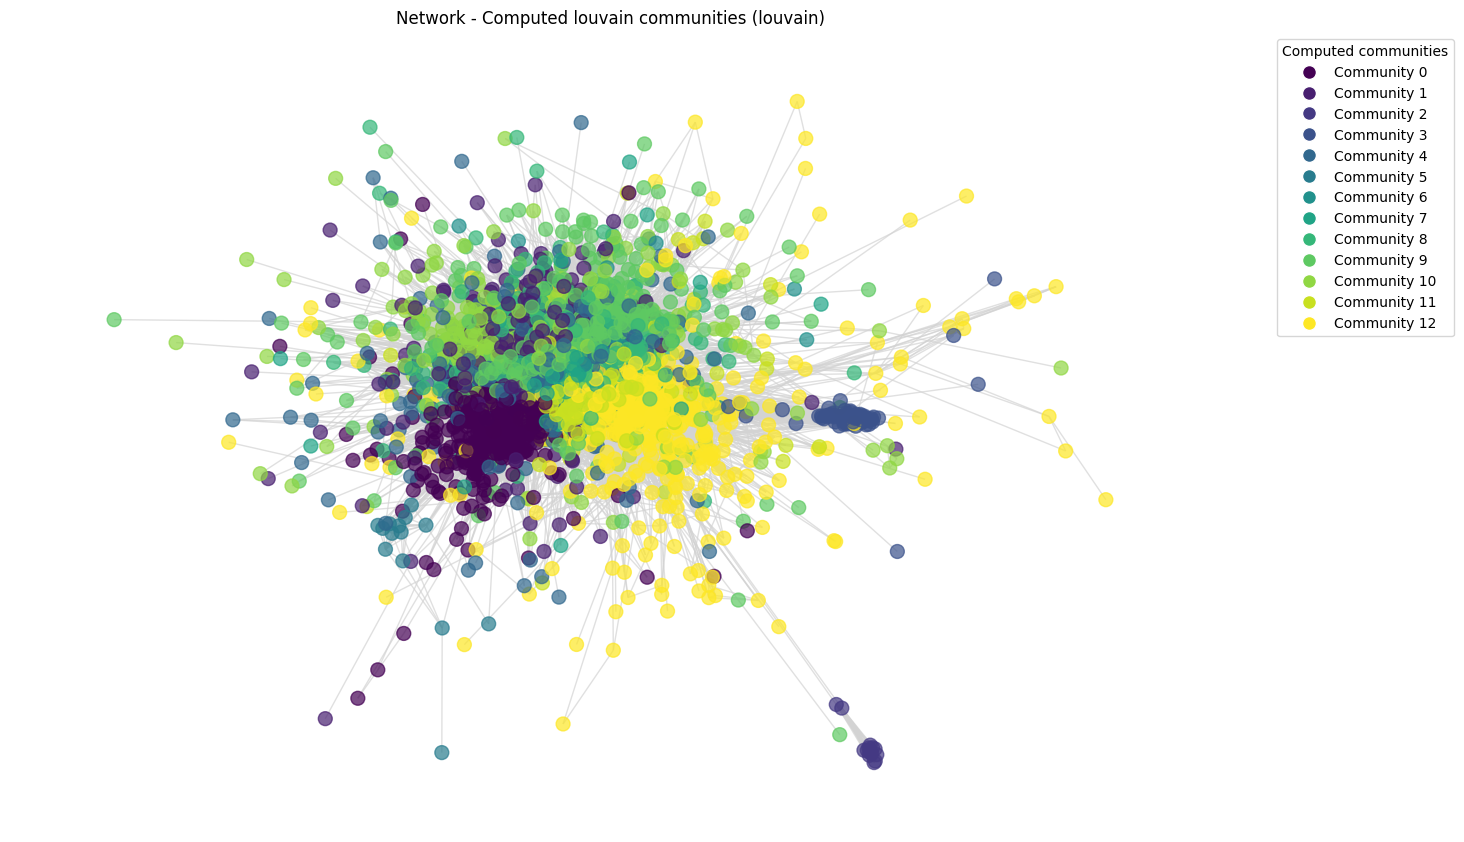

In [24]:
G_sample = GCC_jobs.copy()
communities_set = communities
num_communities = len(communities_set)

partition = {}
for community_id, nodes in enumerate(communities_set):
    for node in nodes:
        partition[node] = community_id

cmap = plt.cm.get_cmap('tab10', num_communities) if num_communities <= 10 else plt.cm.get_cmap('viridis', num_communities)

# --- This is the list for node_color ---
nodes_color_com = [cmap(partition[node]) for node in G_sample.nodes()]

legend_handles = [plt.Line2D([0], [0], marker='o', color='w', label=f'Community {i}', markerfacecolor=cmap(i), markersize=10) for i in range(num_communities)]

plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G_sample, k=0.5, iterations=50)
nx.draw(G_sample, 
        pos, 
        node_size=100, node_color=nodes_color_com, 
        edge_color='lightgray',
        alpha=0.7, with_labels=False)
plt.legend(handles=legend_handles,
           title="Computed communities", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title("Network - Computed louvain communities (louvain)")
plt.tight_layout()
plt.show()